In [1]:
import pandas as pd
data=pd.read_csv('Premier_League.csv')
data=data[['Home Team', 'Away Team', 'Goals Home', 'Away Goals', 'home_chances', 'away_chances', 'home_saves', 'away_saves', 'home_blocked', 'away_blocked']]
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23668\208725023.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Home Team,Away Team,Goals Home,Away Goals,home_chances,away_chances,home_saves,away_saves,home_blocked,away_blocked
0,Arsenal,Wolverhampton Wanderers,5,0,3,0,0,3,2,2
1,Aston Villa,Brighton and Hove Albion,2,1,4,3,3,3,2,1
2,Brentford,Manchester City,1,0,2,1,2,3,3,8
3,Chelsea,Newcastle United,1,1,2,2,3,5,8,4
4,Crystal Palace,Nottingham Forest,1,1,1,0,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...
375,Leeds United,Wolverhampton Wanderers,2,1,2,1,5,3,3,3
376,Newcastle United,Nottingham Forest,2,0,2,0,0,7,5,2
377,Tottenham Hotspur,Southampton,4,1,1,0,1,5,4,3
378,Everton,Chelsea,0,1,0,1,5,3,1,6


In [2]:
data.describe() #wygenerowanie podstawowych statystyk (informacji) na temat danych
data.isnull() #sprawdzenie czy w zbiorze danych nie występują błędy (np. wartości null)

,Home Team,Away Team,Goals Home,Away Goals,home_chances,away_chances,home_saves,away_saves,home_blocked,away_blocked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
375,False,False,False,False,False,False,False,False,False,False
376,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False
378,False,False,False,False,False,False,False,False,False,False


In [3]:
corr_data=data[['Goals Home', 'Away Goals', 'home_chances', 'away_chances', 'home_saves', 'away_saves', 'home_blocked', 'away_blocked']]
corr_data.corr() #wyznaczenie korelacji pomiędzy istotnymi danymi 
#komentarz: najwyższe współczynniki korelacji między kolumnami "Goals Home" i "home_chances", oraz "Away Goals" i "away_chances" wynoszą odpowiednio 0.45 i 0.49
# wskazuje na umiarkowaną dodatnią korelację między tymi parametrami. Nie jest to bardzo silna korelacja, więc można przypuszczać, że te czynniki wpływają na siebie, ale nie jest to jednoznaczne.

,Goals Home,Away Goals,home_chances,away_chances,home_saves,away_saves,home_blocked,away_blocked
Goals Home,1.000000,-0.062236,0.450181,-0.087388,-0.052215,0.052527,0.128249,-0.117929
Away Goals,-0.062236,1.000000,-0.163893,0.494109,0.026744,-0.044966,0.024464,0.016717
home_chances,0.450181,-0.163893,1.000000,-0.089477,-0.003239,0.250894,0.169429,-0.158159
away_chances,-0.087388,0.494109,-0.089477,1.000000,0.228954,-0.083547,-0.029039,0.062747
home_saves,-0.052215,0.026744,-0.003239,0.228954,1.000000,-0.119374,-0.144737,0.289266
away_saves,0.052527,-0.044966,0.250894,-0.083547,-0.119374,1.000000,0.302127,-0.146873
home_blocked,0.128249,0.024464,0.169429,-0.029039,-0.144737,0.302127,1.000000,-0.280942
away_blocked,-0.117929,0.016717,-0.158159,0.062747,0.289266,-0.146873,-0.280942,1.000000


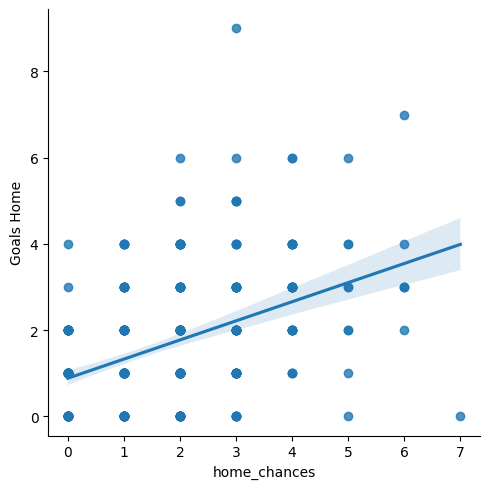

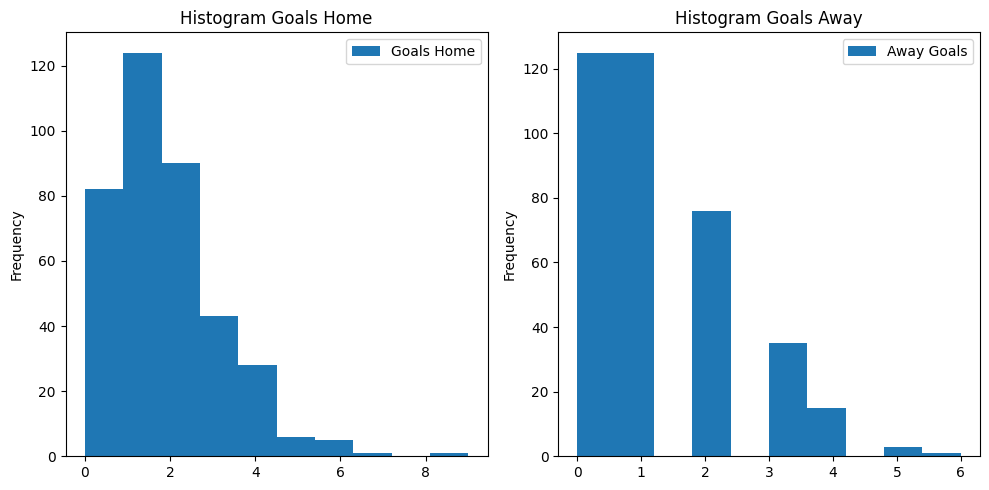

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='home_chances', y='Goals Home', data=corr_data, fit_reg=True)
plt.show()
fig, x=plt.subplots(1, 2, figsize=(10, 5))
corr_data.plot.hist(y='Goals Home', ax=x[0], bins=10)
x[0].set_title('Histogram Goals Home')
corr_data.plot.hist(y='Away Goals', ax=x[1], bins=10)
x[1].set_title('Histogram Goals Away')
plt.tight_layout()
plt.show()

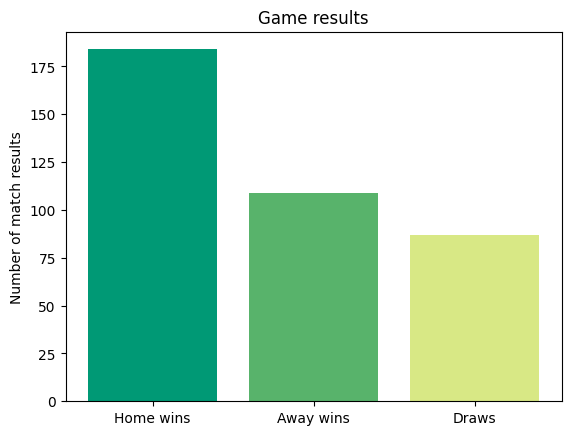

In [31]:
match_results=[0,0,0]
for x,y in corr_data.iterrows():
    if int(y['Goals Home'])>int(y['Away Goals']):
        match_results[0]+=1
    elif int(y['Goals Home'])<int(y['Away Goals']):
        match_results[1]+=1
    else:
        match_results[2]+=1
#print(match_results)
plt.bar(['Home wins', 'Away wins', 'Draws'], match_results, color=['#009975', '#58B36B', '#D8E885'])
plt.title('Game results')
plt.ylabel('Number of match results')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

goals_scored = {}
# for index, row in data.iterrows():
#     if row['Home Team'] in goals_scored:
#         goals_scored[row['Home Team']] += row['Goals Home']
#     else:
#         goals_scored[row['Home Team']] = row['Goals Home']
        
#     if row['Away Team'] in goals_scored:
#         goals_scored[row['Away Team']] += row['Away Goals']
#     else:
#         goals_scored[row['Away Team']] = row['Away Goals']

for index, row in data.iterrows():
    if row['Home Team'] in goals_scored:
        goals_scored[row['Home Team']]['Goals Scored'] += row['Goals Home']
        goals_scored[row['Home Team']]['Goals Conceded'] += row['Away Goals']
    else:
        goals_scored[row['Home Team']] = {'Goals Scored': row['Goals Home'], 'Goals Conceded': row['Away Goals']}

    if row['Away Team'] in goals_scored:
        goals_scored[row['Away Team']]['Goals Scored'] += row['Away Goals']
        goals_scored[row['Away Team']]['Goals Conceded'] += row['Goals Home']
    else:
        goals_scored[row['Away Team']] = {'Goals Scored': row['Away Goals'], 'Goals Conceded': row['Goals Home']}

        
goals_scored

{'Arsenal': {'Goals Scored': 88, 'Goals Conceded': 43},
 'Wolverhampton Wanderers': {'Goals Scored': 31, 'Goals Conceded': 58},
 'Aston Villa': {'Goals Scored': 51, 'Goals Conceded': 46},
 'Brighton and Hove Albion': {'Goals Scored': 72, 'Goals Conceded': 53},
 'Brentford': {'Goals Scored': 58, 'Goals Conceded': 46},
 'Manchester City': {'Goals Scored': 94, 'Goals Conceded': 33},
 'Chelsea': {'Goals Scored': 38, 'Goals Conceded': 47},
 'Newcastle United': {'Goals Scored': 68, 'Goals Conceded': 33},
 'Crystal Palace': {'Goals Scored': 40, 'Goals Conceded': 49},
 'Nottingham Forest': {'Goals Scored': 38, 'Goals Conceded': 68},
 'Everton': {'Goals Scored': 34, 'Goals Conceded': 57},
 'Bournemouth': {'Goals Scored': 37, 'Goals Conceded': 71},
 'Leeds United': {'Goals Scored': 48, 'Goals Conceded': 78},
 'Tottenham Hotspur': {'Goals Scored': 70, 'Goals Conceded': 63},
 'Leicester City': {'Goals Scored': 51, 'Goals Conceded': 68},
 'West Ham United': {'Goals Scored': 42, 'Goals Conceded': 55

In [89]:
import json, pprint
import numpy as np

with open('last_seasons.json') as js:
    last_years_data = json.load(js)

training_data = []

for team, team_data in last_years_data.items():
    goals_scored = team_data['Goals Scored']
    goals_conceded = team_data['Goals Conceded']
    positions = team_data['Position']

    team_training_data = []
    
    for i in range(len(goals_scored)):
        team_training_data.append([goals_scored[i], goals_conceded[i], positions[i]])

    training_data.append(team_training_data)

pprint.pprint(training_data)

training_data_np = np.array(training_data)

# Podział na cechy (X) i etykiety (y)
X = training_data_np[:, :, :2]  # Pierwsze dwie kolumny to cechy (zdobyte bramki i stracone bramki)
y = training_data_np[:, :, 2]   # Trzecia kolumna to etykiety (pozycje w tabeli)

# Spłaszczenie etykiet, ponieważ są one 2D
#y = y.flatten()
# X = X.reshape(-1, 3)
labels = []

for team_data in training_data:
    # Pozycja w tabeli znajduje się na ostatnim miejscu w każdej liście danych treningowych
    position = team_data[-1][-1]
    # Odwróć pozycję w tabeli
    label = 1 / position
    labels.append(label)
y = np.array(labels)
# Wypisanie kształtu X i y dla weryfikacji
print("Kształt X:", X.shape)
print("Kształt y:", y.shape)
y

[[[68, 41, 4],
  [71, 36, 3],
  [63, 36, 3],
  [71, 34, 2],
  [65, 36, 3],
  [74, 25, 2],
  [77, 41, 1],
  [65, 39, 8],
  [71, 43, 4],
  [72, 48, 4],
  [79, 51, 2],
  [68, 51, 3],
  [74, 49, 4],
  [68, 58, 8],
  [63, 51, 8],
  [64, 51, 5],
  [54, 36, 8],
  [49, 51, 5],
  [54, 68, 4],
  [50, 60, 8]],
 [[45, 46, 15],
  [56, 40, 1],
  [47, 44, 14],
  [51, 40, 7],
  [47, 46, 13],
  [36, 37, 7],
  [45, 52, 13],
  [45, 57, 13],
  [0, 0, 20],
  [53, 58, 15],
  [57, 57, 7],
  [43, 53, 7],
  [38, 56, 15],
  [40, 43, 17],
  [36, 52, 15],
  [51, 40, 16],
  [47, 46, 12],
  [0, 0, 20],
  [0, 0, 20],
  [0, 0, 20]],
 [[31, 57, 17],
  [27, 76, 20],
  [0, 0, 20],
  [0, 0, 20],
  [0, 0, 20],
  [41, 67, 17],
  [55, 46, 11],
  [52, 54, 14],
  [51, 46, 7],
  [45, 64, 15],
  [54, 73, 16],
  [47, 58, 15],
  [49, 52, 16],
  [43, 59, 16],
  [51, 56, 17],
  [52, 62, 17],
  [45, 45, 17],
  [47, 49, 18],
  [42, 59, 20],
  [49, 66, 20]],
 [[0, 0, 20],
  [0, 0, 20],
  [0, 0, 20],
  [35, 60, 15],
  [40, 46, 17],
  [

array([0.125     , 0.05      , 0.05      , 0.05      , 0.07142857,
       1.        , 0.33333333, 0.11111111, 0.07142857, 0.08333333,
       0.09090909, 0.07692308, 0.1       , 0.125     , 0.08333333,
       0.16666667, 0.25      , 0.0625    , 0.05263158, 0.25      ])

In [100]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Kształt X_train:", X_train.shape)
print("Kształt y_train:", y_train.shape)
print("Kształt X_test:", X_test.shape)
print("Kształt y_test:", y_test.shape)

X_train_flat = X_train.reshape(16, -1)
X_test_flat = X_test.reshape(4, -1)


model = Ridge(alpha=100000)  # Domyślny parametr alpha=1.0
# model.fit(X_train.reshape(-1, 18), y_train)  # Spłaszcz X_train do dwóch wymiarów

# Przewidywanie na danych testowych
#y_pred = model.predict(X_test.reshape(-1, 18))  # Spłaszcz X_test do dwóch wymiarów

model.fit(X_train_flat, y_train)
y_pred = model.predict(X_test_flat)

# Ocena wydajności modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

# for team, prediction in zip(goals_scored.keys(), y_pred):
#     print(f"Drużyna: {team}, Prawdopodobieństwo zwycięstwa: {prediction}")


Kształt X_train: (16, 20, 2)
Kształt y_train: (16,)
Kształt X_test: (4, 20, 2)
Kształt y_test: (4,)
Mean Squared Error: 0.00466376712179851
R^2 Score: -1.0794038604013099
